In [2]:
import pandas as pd

# Installing ydata-profiling for datasets profiling

In [3]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
sales=pd.read_csv('/Users/aakashsingh/Desktop/Jupyter Notebook/Diwali sales Project/Brocode.csv',encoding=('ISO-8859-1'),low_memory=False)

In [5]:
from pandas_profiling import ProfileReport

/Users/aakashsingh/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/aakashsingh/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
/var/folders/s7/hq55kw855x90km983ywxp0n80000gn/T/ipykernel_68972/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be de

In [6]:
profile=ProfileReport(sales)

In [7]:
profile.to_file(output_file='/Users/aakashsingh/Desktop/Jupyter Notebook/Diwali sales Project/Brocode.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile

# Data Reading

In [9]:
sales.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [14]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [15]:
sales.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# Removing Null datasets columns(Data Cleaning)

In [16]:
sales.drop(['Status','unnamed1'],axis=1,inplace= True)

In [17]:
sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Linear regression model

In [58]:
x=sales[['Age']]

In [59]:
y=sales[['Orders']]

In [60]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [63]:
x_train.head()

,Age
10687,26
9569,42
5358,28
9167,42
5994,16


In [64]:
x_test.head()

,Age
6932,40
10957,31
11032,29
8417,41
2794,23


In [65]:
y_train.head()

,Orders
10687,1
9569,3
5358,2
9167,3
5994,1


In [66]:
y_test.head()

,Orders
6932,4
10957,4
11032,4
8417,1
2794,1


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()

In [69]:
import numpy as np

In [70]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [71]:
y_pred=lr.predict(x_test)

/Users/aakashsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [72]:
y_test.head()

,Orders
6932,4
10957,4
11032,4
8417,1
2794,1


In [73]:
y_pred[0:5]

array([[2.49870368],
       [2.48791229],
       [2.4855142 ],
       [2.49990272],
       [2.47831993]])

# Mean_Squared_Root

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(y_test,y_pred)

1.2496473967611512

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# DATA VISUALIZATION

# Scatterplot shows the variation of Age w.r.t amount they spend in the sales

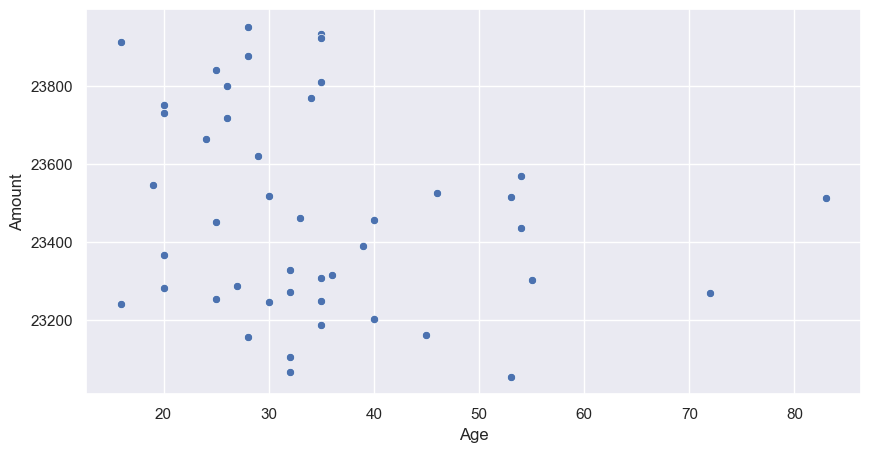

In [275]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='Age',y='Amount',data=sales[0:50])
plt.show()

# State-Wise(MAximum People Invovled in Sales)

In [91]:
sales['State'].value_counts()

Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [105]:
sales['State'].value_counts()[0:5]

Uttar Pradesh     1946
Maharashtra       1526
Karnataka         1305
Delhi             1107
Madhya Pradesh     923
Name: State, dtype: int64

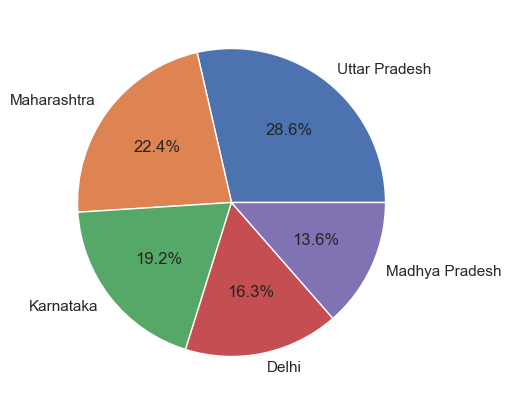

In [109]:
plt.figure(figsize=(10,5))
plt.pie(list(sales['State'].value_counts()[0:5]),labels=list(sales['State'].value_counts()[0:5].keys()),autopct=('%0.1f%%'))
plt.show()

# Age Group involved in Sales

In [127]:
sales['Age Group'].value_counts()

26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64

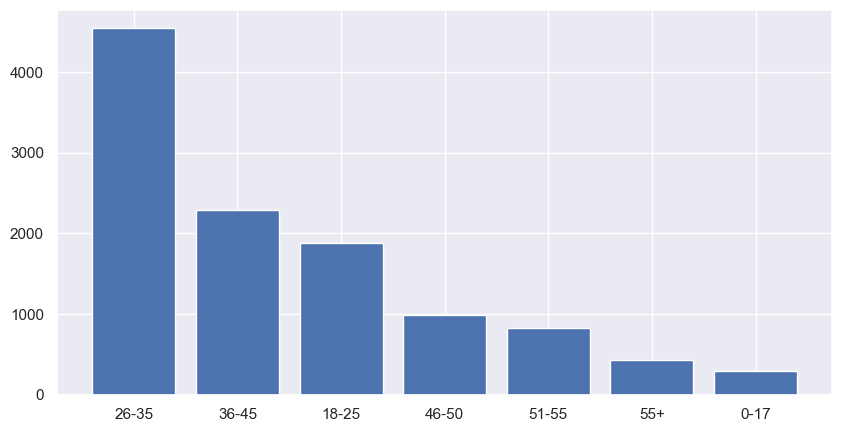

In [126]:
plt.figure(figsize=[10,5])
plt.bar(list(sales['Age Group'].value_counts().keys()),list(sales['Age Group'].value_counts()))
plt.show()

# Gender involved in Sales 

In [128]:
sales['Gender'].value_counts()

F    7842
M    3409
Name: Gender, dtype: int64

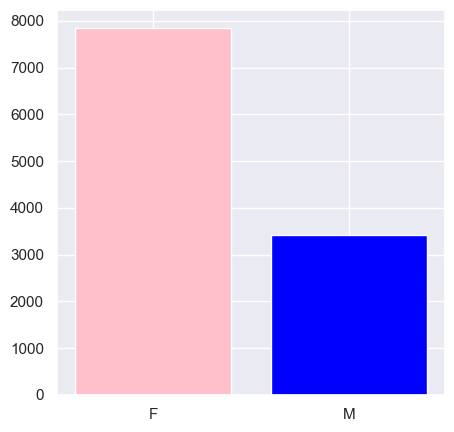

In [130]:
plt.figure(figsize=(5,5))
plt.bar(list(sales['Gender'].value_counts().keys()),list(sales['Gender'].value_counts()),color=['pink','blue'])
plt.show()

In [160]:
Purchasing_Capacity=sales[sales['Amount']>=15000]
Purchasing_Capacity.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# People Spends in Sales

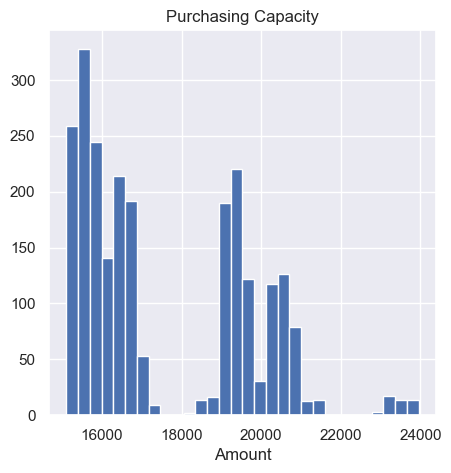

In [276]:
plt.figure(figsize=(5,5))
plt.hist(Purchasing_Capacity['Amount'],bins=30)
plt.title("Purchasing Capacity")
plt.xlabel("Amount")
plt.show()

# Sales Analysis through Logistic Regression

In [164]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [165]:
sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Outliers representation through Boxplot

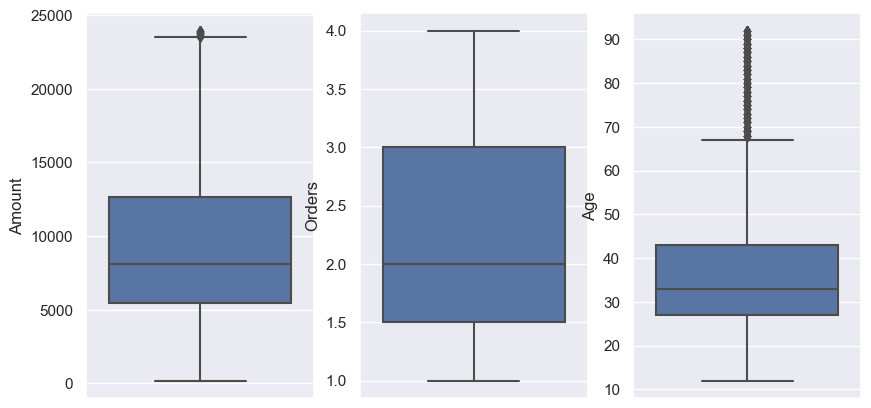

In [179]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(y=sales['Amount'])

plt.subplot(1,3,2)
sns.boxplot(y=sales["Orders"])

plt.subplot(1,3,3)
sns.boxplot(y=sales["Age"])
plt.show()



In [184]:
sales['Zone'].value_counts(normalize=True)

Central     0.381833
Southern    0.239534
Western     0.173762
Northern    0.132522
Eastern     0.072349
Name: Zone, dtype: float64

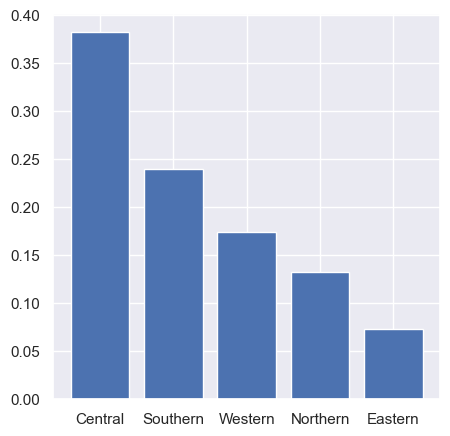

In [278]:
plt.figure(figsize=(5,5))
plt.bar(list(sales['Zone'].value_counts().keys()),list(sales['Zone'].value_counts(normalize=True)))
plt.show()

In [326]:
sales['Marital_Status'].value_counts(normalize=True)

0    6522
1    4729
Name: Marital_Status, dtype: int64

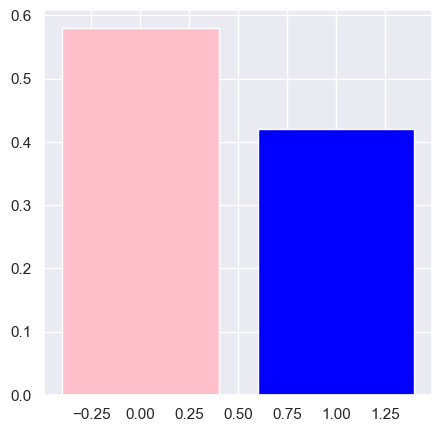

In [327]:
plt.figure(figsize=(5,5))
plt.bar(list(sales['Marital_Status'].value_counts().keys()),list(sales['Marital_Status'].value_counts(normalize=True)),color=['pink','blue'])
plt.show()

In [325]:
sales['Occupation'].value_counts(normalize=True)[0:5]

IT Sector     0.141143
Healthcare    0.125144
Aviation      0.116434
Banking       0.101235
Govt          0.075904
Name: Occupation, dtype: float64

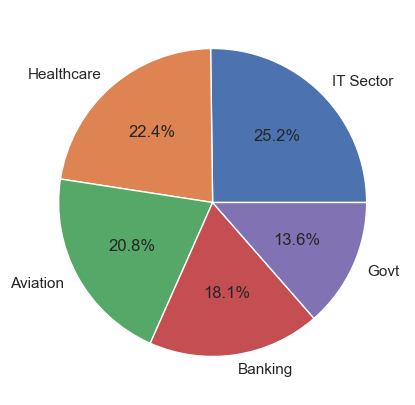

In [281]:
plt.figure(figsize=(10,5))
plt.pie(list(sales['Occupation'].value_counts()[0:5]),labels=list(sales['Occupation'].value_counts()[0:5].keys()),autopct=('%0.1f%%'))
plt.show()

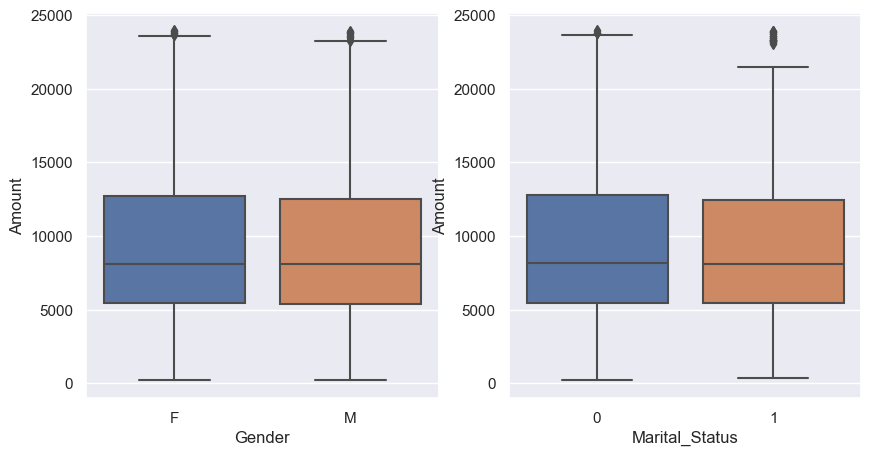

In [211]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x=sales['Gender'],y=sales['Amount'])

plt.subplot(1,2,2)
sns.boxplot(x=sales['Marital_Status'],y=sales['Amount'])
plt.show()


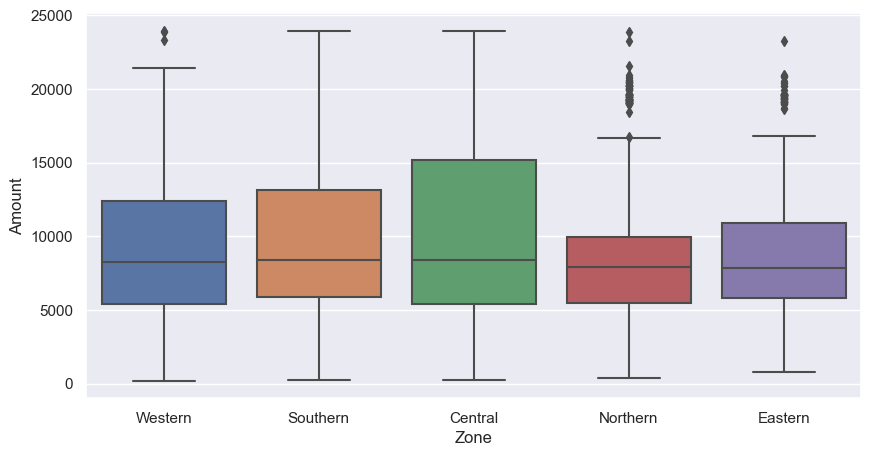

In [210]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.boxplot(x=sales['Zone'],y=sales['Amount'])
plt.show()

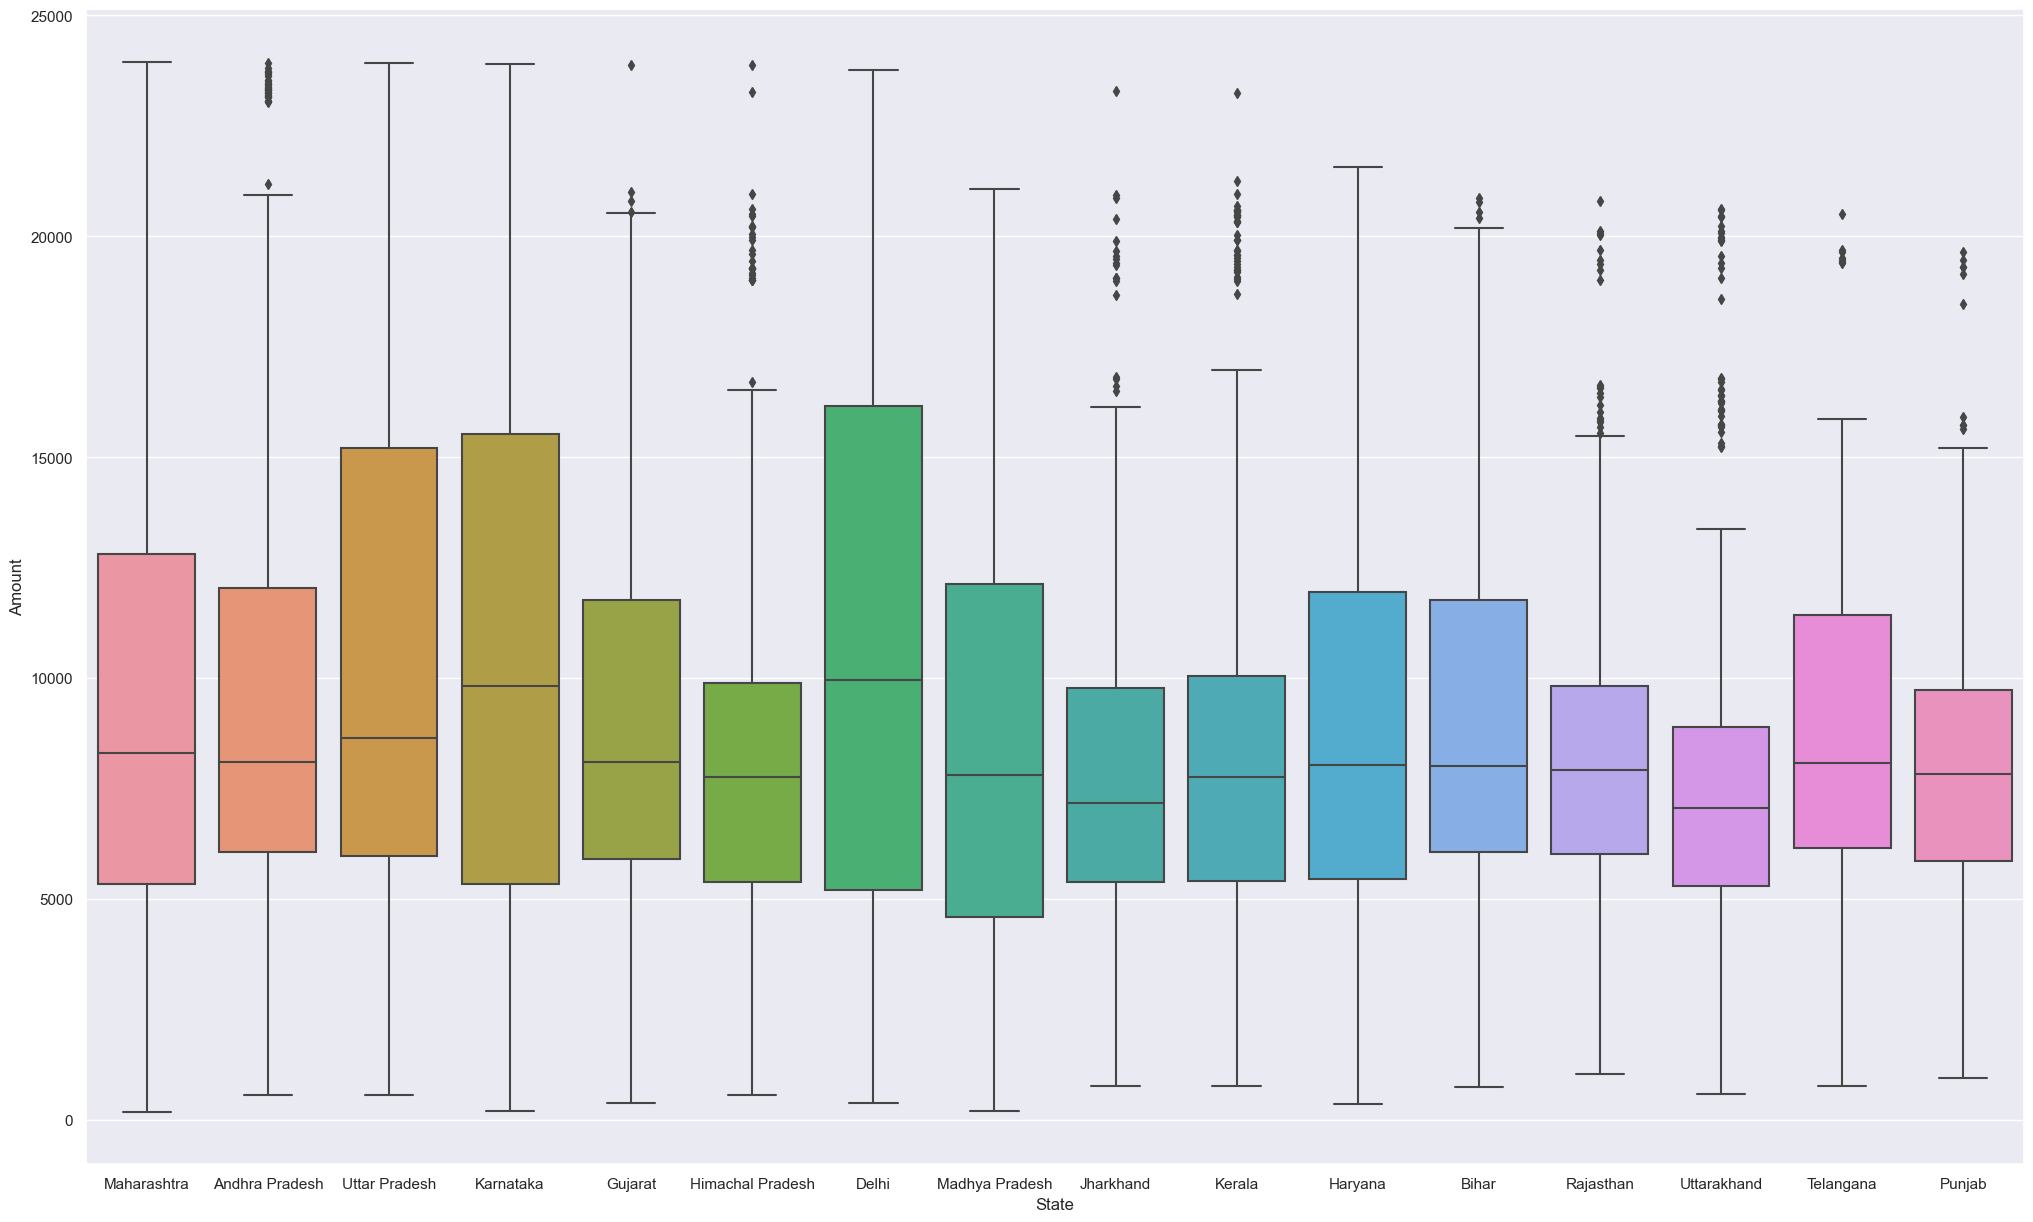

In [208]:
plt.figure(figsize=(25,15))
plt.subplot(1,1,1)
sns.boxplot(x=sales['State'],y=sales['Amount'])
plt.show()

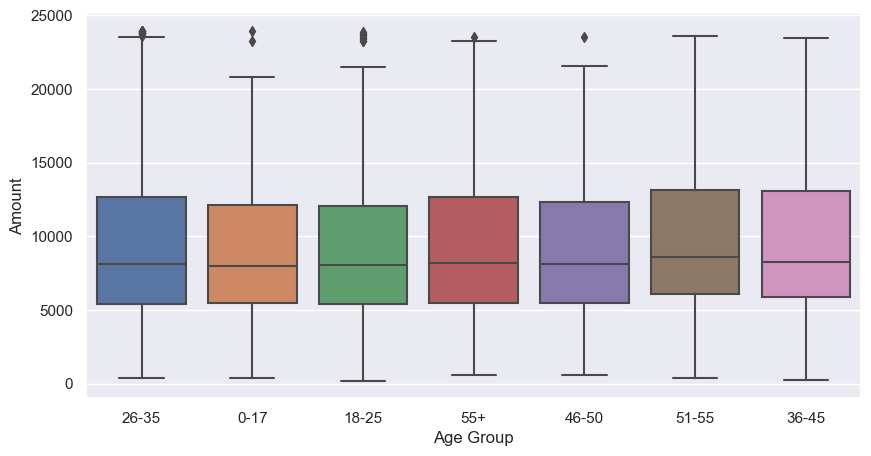

In [201]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.boxplot(x=sales['Age Group'],y=sales['Amount'])
plt.show()

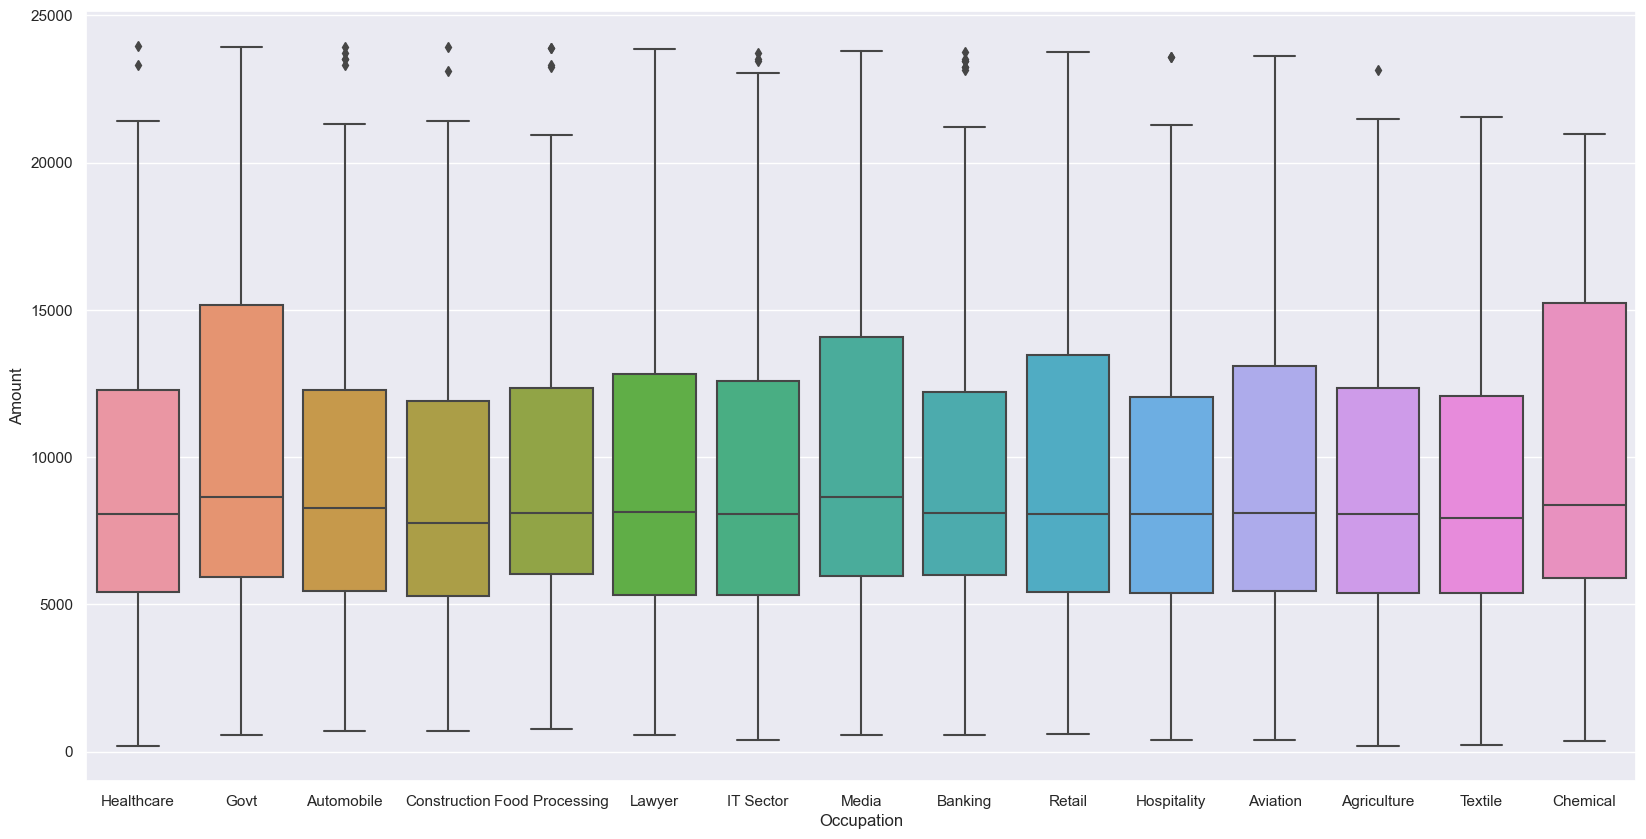

In [218]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.boxplot(x=sales['Occupation'],y=sales['Amount'])
plt.show()

# Correlation of different Attributes w.r.t Orders

In [225]:
pd.crosstab(sales['Gender'],sales['Orders'],normalize='index').round(2)

Orders,1,2,3,4
Gender,,,,
F,0.25,0.26,0.25,0.25
M,0.26,0.26,0.24,0.24


In [228]:
pd.crosstab(sales['State'],sales['Orders'],normalize='index').round(2)

Orders,1,2,3,4
State,,,,
Andhra Pradesh,0.23,0.27,0.23,0.26
Bihar,0.26,0.26,0.25,0.23
Delhi,0.26,0.24,0.25,0.24
Gujarat,0.23,0.28,0.26,0.23
Haryana,0.25,0.29,0.23,0.23
Himachal Pradesh,0.23,0.25,0.23,0.29
Jharkhand,0.23,0.27,0.27,0.24
Karnataka,0.25,0.25,0.26,0.24
Kerala,0.24,0.25,0.28,0.23


In [229]:
pd.crosstab(sales['Zone'],sales['Orders'],normalize='index').round(2)

Orders,1,2,3,4
Zone,,,,
Central,0.25,0.26,0.24,0.24
Eastern,0.25,0.26,0.26,0.23
Northern,0.25,0.27,0.22,0.26
Southern,0.24,0.26,0.25,0.25
Western,0.26,0.24,0.26,0.25


In [230]:
pd.crosstab(sales['Marital_Status'],sales['Orders'],normalize='index').round(2)

Orders,1,2,3,4
Marital_Status,,,,
0,0.25,0.26,0.24,0.25
1,0.25,0.26,0.25,0.24


In [232]:
pd.crosstab(sales['Age Group'],sales['Orders'],normalize='index').round(2)



Orders,1,2,3,4
Age Group,,,,
0-17,0.31,0.25,0.25,0.19
18-25,0.25,0.26,0.25,0.24
26-35,0.24,0.25,0.25,0.25
36-45,0.24,0.27,0.24,0.25
46-50,0.29,0.25,0.22,0.24
51-55,0.23,0.27,0.24,0.26
55+,0.26,0.22,0.26,0.25


# Removal of Outliers

In [288]:
Q1,Q3=sales['Amount'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [289]:
UL

23523.0

In [290]:
df=sales[sales['Amount']>UL]

In [306]:
df[0:5]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [302]:
df['Orders'].count()

19

In [307]:
df['Orders'].value_counts(normalize=True)

2    0.368421
1    0.315789
4    0.210526
3    0.105263
Name: Orders, dtype: float64

In [304]:
df['Marital_Status'].count()

19

In [309]:
df['Marital_Status'].value_counts(normalize=True)

1    0.631579
0    0.368421
Name: Marital_Status, dtype: float64

In [305]:
df['Gender'].count()

19

In [310]:
df['Gender'].value_counts(normalize=True)

F    0.578947
M    0.421053
Name: Gender, dtype: float64

In [311]:
df['State'].count()

19

In [313]:
df['State'].value_counts(normalize=True)[0:5]

Andhra Pradesh    0.421053
Uttar Pradesh     0.315789
Maharashtra       0.052632
Karnataka         0.052632
Gujarat           0.052632
Name: State, dtype: float64

In [314]:
df['Zone'].count()

19

In [315]:
df['Zone'].value_counts(normalize=True)

Southern    0.473684
Central     0.368421
Western     0.105263
Northern    0.052632
Name: Zone, dtype: float64

In [316]:
df['Occupation'].count()

19

In [318]:
df['Occupation'].value_counts(normalize=True)[0:5]

Govt               0.210526
Automobile         0.105263
Food Processing    0.105263
Banking            0.105263
Hospitality        0.105263
Name: Occupation, dtype: float64

In [319]:
df['Age Group'].count()

19

In [323]:
df['Age Group'].value_counts(normalize=True)[0:5]

26-35    0.526316
18-25    0.263158
51-55    0.105263
0-17     0.052632
46-50    0.052632
Name: Age Group, dtype: float64

In [328]:
sales['Amount']=np.where(sales['Amount']>UL,UL,sales['Amount'])

# Outlier free "Amount"

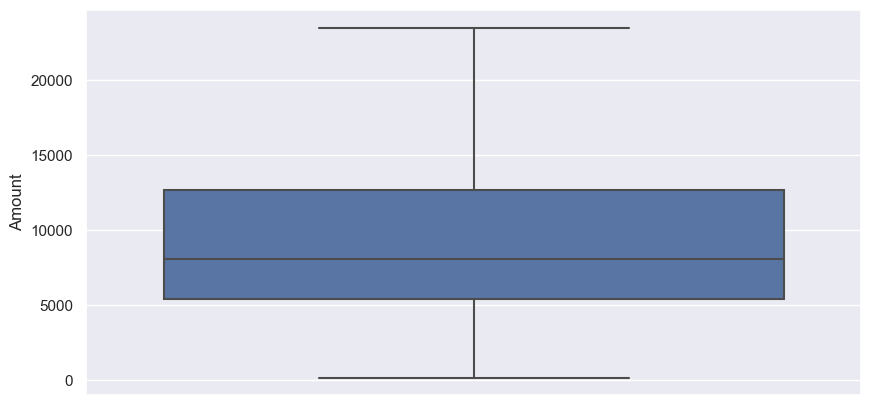

In [329]:
sns.boxplot(y=sales['Amount'])
plt.show()

#CONCLUSION


1.By conducting this analysis and removing outliers, we aim to provide accurate insights into the Diwali sales performance.
2.These insights can help us make informed decisions and strategies to improve future festive season sales.
3.Remove outliers with an upper limit value exceeding 23,523.
4.Calculate summary statistics (mean, median, standard deviation, etc.) of the cleaned dataset.
5.Visualize the sales performance of different products during Diwali using plots and charts.
6.Identify the top-selling "Age Group", "Zone", "State", "Gender" and their contribution to overall revenue.


